# The Effect of Potential Growth Assumptions on Adjustment Targets in Germany

This file uses the European Commission's DSA model to assess the sensitivity of German SPB targets to potential growth assumptions under the new EU Fiscal Rules.

Scenarios assume a unifrom level shift in future potential growth between 0 and 0.5 percentage point.

In [2]:
# Set autoreleoad
%load_ext autoreload
%autoreload 2

# Import libraries and modules
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import DSA model class and stochastic subclass
sys.path.append(os.path.abspath('..'))
from classes import StochasticDsaModel as dsa
from functions import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
# initialize results_dict and loop through adjustment periods and rg_adj values
results_dict = {}
for period in [4,7]:
    results_dict[period] = {}
    for rg_adj in np.linspace(0,0.5,6):

        # initialize DSA model for Germany
        model = dsa('DEU', adjustment_period=period)
        
        # adjust potential GDP growth, re-project GDP to adjust output gap
        for t in range(1, model.projection_period):
            model.rg_pot[t] += rg_adj
            model.rgdp_pot[t] = model.rgdp_pot[t - 1] * (1 + model.rg_pot[t] / 100)
        model.rg_pot_bl = model.rg_pot.copy()
        model.rgdp_pot_bl = model.rgdp_pot.copy()
        model._project_gdp()

        # calculate adjustment requirements and save results
        model.find_spb_binding(edp=False)
        results_dict[period][rg_adj] = model.spb_target_dict

                Model Params                            SPB Targets       
============================================     =========================
country                                  DEU     main_adjustment     0.345
adjustment period                          4     lower_spb           0.757
adjustment start                        2025     financial_stress    0.384
shock frequency                    quarterly     adverse_r_g         0.740
stochastic period                  2029-2034     deficit_reduction  -0.280
estimation                            normal     stochastic          0.380
bond level data                        False     binding             0.757
safeguards          debt, deficit_resilience                              
============================================     =========================

                              Binding Params                              
spb_steps                                       0.276, 0.276, 0.276, 0.276
spb_target              

In [26]:
# Create DataFrame with results in two columns
results_df = pd.DataFrame.from_dict(
    {period: {rg_adj: results_dict[period][rg_adj]['binding'] for rg_adj in results_dict[period]} for period in results_dict},
    orient='index'
).T.reset_index().round(2)
results_df.columns = ['Potential growth effect', 'SPB target (4-year)', 'SPB target (7-year)']
results_df

,Potential growth effect,SPB target (4-year),SPB target (7-year)
0,0.000,0.760,0.540
1,0.100,0.690,0.460
2,0.200,0.620,0.390
3,0.300,0.550,0.310
4,0.400,0.480,0.240
5,0.500,0.410,0.160


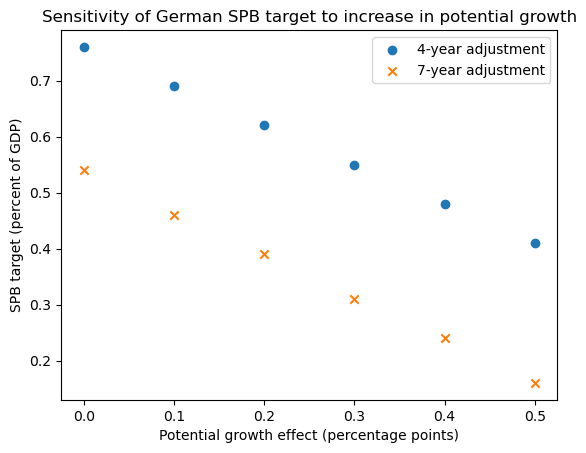

In [44]:
# plot results_df in one scatter plot
plt.figure()
plt.scatter(results_df['Potential growth effect'], results_df['SPB target (4-year)'], label='4-year adjustment', marker='o')
plt.scatter(results_df['Potential growth effect'], results_df['SPB target (7-year)'], label='7-year adjustment', marker='x')
plt.title('Sensitivity of German SPB target to increase in potential growth')
plt.xlabel('Potential growth effect (percentage points)')
plt.ylabel('SPB target (percent of GDP)')
plt.legend()

In [ ]:
# slope of linear regression line
slope_4 = np.polyfit(results_df['Potential growth effect'], results_df['SPB target (4-year)'], 1)[0]
slope_7 = np.polyfit(results_df['Potential growth effect'], results_df['SPB target (7-year)'], 1)[0]
print(f"Slope of regression line for 4-year adjustment: {slope_4:.2f}")
print(f"Slope of regression line for 7-year adjustment: {slope_7:.2f}")

Slope of regression line for 4-year adjustment: -0.70
Slope of regression line for 7-year adjustment: -0.75
